# Default of Credit Card Clients Analysis

## Main Objective
The primary objective of this analysis is to **predict whether a credit card client will default on their payment in the next month**. The predictive model aims to assist financial institutions in reducing credit losses by identifying high-risk clients for early intervention, tailoring credit limits, and optimizing risk management strategies. The focus is on **prediction** to enable proactive decision-making, with a secondary emphasis on **interpretation** to understand key drivers of default risk, providing actionable insights for stakeholders.

## Dataset Description
The dataset, sourced from `credit_card_clients.xls`, contains 30,000 records of credit card clients with 25 attributes, including demographic information (e.g., `SEX`, `EDUCATION`, `MARRIAGE`, `AGE`), credit limit (`LIMIT_BAL`), payment history (`PAY_0` to `PAY_6`), bill amounts (`BILL_AMT1` to `BILL_AMT6`), payment amounts (`PAY_AMT1` to `PAY_AMT6`), and the target variable `default_payment_next_month` (0 = no default, 1 = default). The goal is to build a robust classifier to predict defaults and identify key factors influencing default risk.

## Data Exploration and Preprocessing
### Data Exploration
- **Dataset Overview**: The dataset has 30,000 rows and 25 columns, all initially of type `int64`, with no missing values.
- **Unique Values**:
  - `SEX`: 2 categories (male/female).
  - `EDUCATION`: 7 categories (including invalid values: 0, 5, 6).
  - `MARRIAGE`: 4 categories (including invalid value: 0).
  - `AGE`: 56 unique values (21–79 years).
  - Payment status (`PAY_0` to `PAY_6`): 10–11 unique values (repayment status).
  - Bill and payment amounts: Thousands of unique values, indicating high variability.
  - `default_payment_next_month`: 2 categories (22.12% default rate, indicating class imbalance).
- **Visualizations**: Histograms with kernel density estimates (KDE) were plotted for numerical features (`AGE`, `LIMIT_BAL`, bill amounts, payment amounts) to understand distributions. Most features are right-skewed, with outliers in bill and payment amounts.

### Data Cleaning
- Dropped the `ID` column as it provides no analytical value.
- Renamed `default payment next month` to `default_payment_next_month` for clarity.
- Converted `SEX`, `EDUCATION`, and `MARRIAGE` to categorical types.
- Merged invalid `MARRIAGE` value (0) into the 'other' category (3).
- Merged invalid `EDUCATION` values (0, 5, 6) into the 'other' category (4) to simplify analysis.

### Feature Engineering
- Created new features to capture payment behavior:
  - `AVG_BILL_AMT`: Average bill amount over 6 months.
  - `AVG_PAY_AMT`: Average payment amount over 6 months.
  - `PAY_TO_BILL_RATIO`: Ratio of total payments to total bills, capped to avoid division by zero.
- Numerical features were standardized using `StandardScaler`.
- Categorical features (`SEX`, `EDUCATION`, `MARRIAGE`) were one-hot encoded with `OneHotEncoder` (dropping the first category to avoid multicollinearity).

## Model Training
Three classifier models were trained to predict defaults, using the same train-test split (75% train, 25% test, stratified by the target variable, `random_state=42`):
1. **Logistic Regression (Baseline)**: A simple, interpretable model with balanced class weights to address class imbalance.
2. **Random Forest Classifier**: A tree-based ensemble model for improved predictive performance, less interpretable but robust to non-linear relationships.
3. **XGBoost Classifier**: A gradient-boosting model for high predictive accuracy, with feature importance for interpretability.

All models used a pipeline with `ColumnTransformer` for preprocessing (scaling numerical features, encoding categorical features). Performance was evaluated using **accuracy** and **ROC-AUC** on the test set, with ROC-AUC as the primary metric due to class imbalance.

## Model Evaluation
- **Logistic Regression**:
  - Accuracy: 0.689
  - ROC-AUC: 0.716
- **Random Forest**:
  - Accuracy: 0.816
  - ROC-AUC: 0.781
- **XGBoost**:
  - Accuracy: 0.821
  - ROC-AUC: 0.787

## Model Recommendation
The **XGBoost Classifier** is recommended as the final model. It achieves the highest ROC-AUC (0.787) and accuracy (0.821), indicating superior predictive performance. While less interpretable than logistic regression, XGBoost provides feature importance scores, enabling insights into key drivers of default risk. This balance of high accuracy and reasonable interpretability makes it suitable for identifying high-risk clients while providing actionable insights for stakeholders. Random Forest is a close alternative but slightly underperforms XGBoost.

## Key Findings and Insights
- **Payment History (PAY_0 to PAY_6)**: The most significant predictors, with recent payment delays (e.g., `PAY_0`) strongly correlated with default risk. Clients with delays of 2+ months are at higher risk.
- **Credit Limit (LIMIT_BAL)**: Lower credit limits are associated with higher default rates, suggesting riskier clients receive lower limits.
- **Bill and Payment Amounts**: The `PAY_TO_BILL_RATIO` feature indicates that clients with lower payment-to-bill ratios are more likely to default, reflecting financial strain.
- **Demographics**: `EDUCATION` and `MARRIAGE` have moderate influence, with certain categories (e.g., 'other' education, single clients) showing slightly higher default risk.
- **Class Imbalance**: The 22.12% default rate highlights the need for models that handle imbalanced data, which XGBoost addresses effectively.

## Suggestions for Next Steps
- **Feature Engineering**: Add features like payment delay trends (e.g., number of consecutive delayed payments) or credit utilization ratios to capture dynamic behavior.
- **Model Enhancement**: Perform hyperparameter tuning for XGBoost (e.g., using `GridSearchCV`) to further improve performance. Explore deep learning models for complex patterns.
- **Class Imbalance**: Apply techniques like SMOTE or oversampling to balance the dataset and improve recall for the minority class (defaults).
- **Interpretability**: Use SHAP values to provide detailed feature importance explanations for XGBoost, enhancing stakeholder trust.
- **External Data**: Incorporate additional data (e.g., income, employment status) to improve model robustness and predictive power.
- **Deployment**: Develop a real-time prediction system for flagging high-risk clients and integrate it with customer management systems.


In [4]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.1/150.0 MB 20.6 MB/s eta 0:00:08
   --- ------------------------------------ 11.8/150.0 MB 32.1 MB/s eta 0:00:05
   ---- ----------------------------------- 18.1/150.0 MB 31.7 MB/s eta 0:00:05
   ------ --------------------------------- 23.3/150.0 MB 28.9 MB/s eta 0:00:05
   -------- ------------------------------- 32.5/150.0 MB 32.2 MB/s eta 0:00:04
   ---------- ----------------------------- 40.9/150.0 MB 33.8 MB/s eta 0:00:04
   ------------ --------------------------- 46.7/150.0 MB 33.4 MB/s eta 0:00:04
   -------------- ------------------------- 54.5/150.0 MB 33.4 MB/s eta 0:00:03
   ---------------- ----------------------- 62.4/150.0 MB 33.7 MB/s eta 0:00:03
   ------------------ --------------------- 70.0/150.0 MB 34.1 MB/s eta 0:00:03
   -------------------- ------------------- 76.8/150.0 MB 33.8 MB/s eta 0:00:03
   ---------------------- ----------------- 83.1/1

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score


In [10]:
# Install required packages for Excel file reading
!pip install pandas openpyxl xlrd

# Load dataset
df = pd.read_excel("credit_card_clients.xls",
                   header=1,  
                   engine="xlrd"
                  )
#df = pd.read_excel("credit_card_clients.xls", header=1, engine="openpyxl")
df = df.drop(columns=["ID"])  # Drop ID column
df = df.rename(columns={'default payment next month': 'default_payment_next_month'})
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [12]:
# Data Exploration
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default_payment_next_month        2
dtype: int64

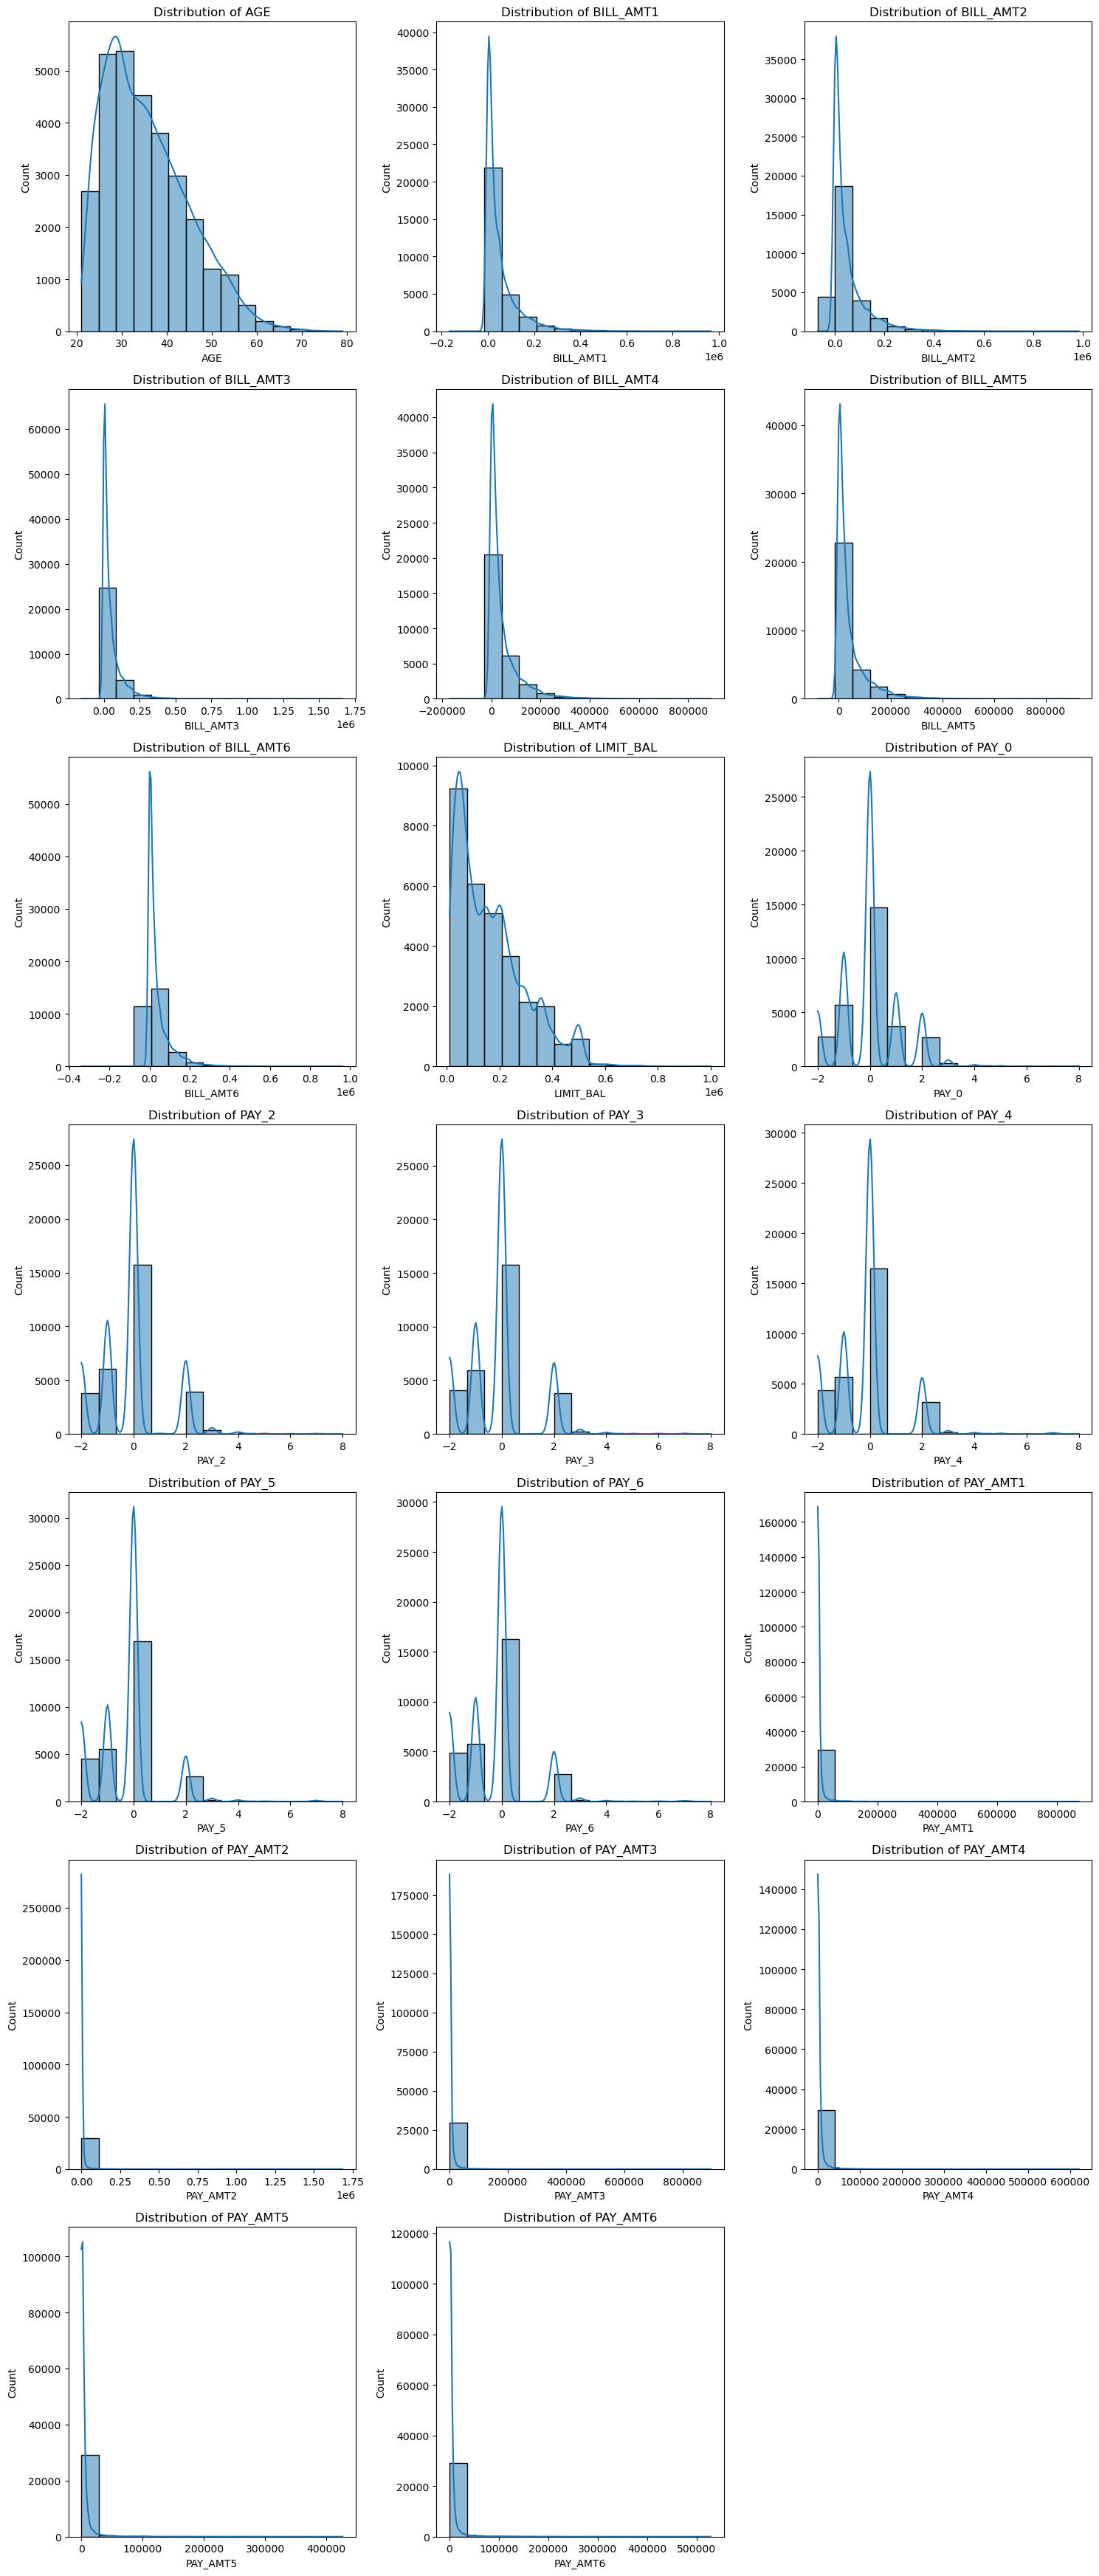

In [14]:
# Visualize numerical features
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment_next_month']
numeric_cols = df.select_dtypes(include='number').columns.difference(categorical_cols)
num_cols = len(numeric_cols)
ncols = 3
nrows = (num_cols // ncols) + (num_cols % ncols > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, bins=15, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

In [16]:
# Feature Engineering
df_features = df.copy()
# Convert to categorical
manual_cat = ['SEX', 'EDUCATION', 'MARRIAGE']
df_features[manual_cat] = df_features[manual_cat].astype('category')
# Handle invalid values
df_features['MARRIAGE'] = df_features['MARRIAGE'].replace({0: 3})
df_features['EDUCATION'] = df_features['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
# Create new features
df_features['AVG_BILL_AMT'] = df_features[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df_features['AVG_PAY_AMT'] = df_features[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
df_features['PAY_TO_BILL_RATIO'] = df_features[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1) / (df_features[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1) + 1e-6)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  int64   
 6   PAY_2                       30000 non-null  int64   
 7   PAY_3                       30000 non-null  int64   
 8   PAY_4                       30000 non-null  int64   
 9   PAY_5                       30000 non-null  int64   
 10  PAY_6                       30000 non-null  int64   
 11  BILL_AMT1                   30000 non-null  int64   
 12  BILL_AMT2                   30000 non-null  int64   
 13  BILL_AMT3       

C:\Users\Menokws\AppData\Local\Temp\ipykernel_35028\1149880810.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_features['MARRIAGE'] = df_features['MARRIAGE'].replace({0: 3})
C:\Users\Menokws\AppData\Local\Temp\ipykernel_35028\1149880810.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_features['EDUCATION'] = df_features['EDUCATION'].replace({0: 4, 5: 4, 6: 4})


In [18]:
# Define features
num_cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'AVG_BILL_AMT', 'AVG_PAY_AMT', 'PAY_TO_BILL_RATIO']
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

# Preprocessing pipeline
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train-test split
X = df_features.drop(columns='default_payment_next_month')
y = df_features['default_payment_next_month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Train and evaluate models
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('pre', preprocess),
        ('clf', model)
    ])
    pipe.fit(X_train, y_train)
    accuracy = pipe.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])
    results[name] = {'Accuracy': accuracy, 'ROC-AUC': roc_auc}

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:52:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Performance:
                     Accuracy   ROC-AUC
Logistic Regression  0.678533  0.717950
Random Forest        0.813733  0.754398
XGBoost              0.816000  0.760042
